In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
ticker = "INFY"
data = yf.download(ticker, start="2023-04-01", end="2024-03-31")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-03,17.209999,17.440001,17.209999,17.420000,16.966270,8446400
2023-04-04,17.430000,17.459999,17.340000,17.370001,16.917574,7522300
2023-04-05,17.389999,17.440001,17.240000,17.330000,16.878614,5559700
2023-04-06,17.299999,17.370001,17.150000,17.250000,16.800699,6830800
2023-04-10,17.360001,17.400000,17.200001,17.389999,16.937050,9204200
...,...,...,...,...,...,...
2024-03-22,18.110001,18.120001,17.690001,17.719999,17.719999,15028500
2024-03-25,17.790001,17.790001,17.590000,17.629999,17.629999,12454500
2024-03-26,17.709999,17.820000,17.639999,17.750000,17.750000,10500900


Problem 1(a)

In [ ]:
data["Capital"] = [0.0]*len(data) #Gives capital at the end of each day
initial_cap = 100000
for i in range(len(data)):
    data.iat[i,6] = initial_cap * data.iat[i,3] / data.iat[i,0]
    initial_cap = data.iat[i,6]
data

,Open,High,Low,Close,Adj Close,Volume,Capital
Date,,,,,,,
2023-04-03,17.209999,17.440001,17.209999,17.420000,16.966270,8446400,101220.226630
2023-04-04,17.430000,17.459999,17.340000,17.370001,16.917574,7522300,100871.795222
2023-04-05,17.389999,17.440001,17.240000,17.330000,16.878614,5559700,100523.764512
2023-04-06,17.299999,17.370001,17.150000,17.250000,16.800699,6830800,100233.237821
2023-04-10,17.360001,17.400000,17.200001,17.389999,16.937050,9204200,100406.444887
...,...,...,...,...,...,...,...
2024-03-22,18.110001,18.120001,17.690001,17.719999,17.719999,15028500,111566.589342
2024-03-25,17.790001,17.790001,17.590000,17.629999,17.629999,12454500,110563.168929
2024-03-26,17.709999,17.820000,17.639999,17.750000,17.750000,10500900,110812.893842


In [ ]:
print("Final Capital: ", data.iat[len(data)-1,6])

Final Capital: 111434.393096


Problem 1(b)

Sharpe Ratio = -0.13975839990288277
Maximum Drawdown = 2.660000801086426


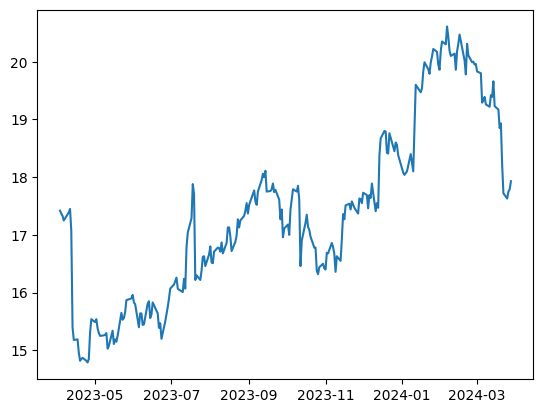

In [18]:
data["Daily Returns"] = (data["Close"] - data["Open"])*100/data["Open"]
rfr = 2 #assumed risk free rate
#In sharpe ratio we use Annualized standard deviation of exess returns
sharpe_ratio = (data["Daily Returns"].mean() - rfr)/((252**0.5) * data["Daily Returns"].std())

plt.plot(data["Close"])
#From the plot its clear the maximum drawdown is from initial to around 2023-05
max_drawdown = data.loc["2023-04-01":"2023-05-01","Close"].max() - data.loc["2023-04-01":"2023-05-01","Close"].min()

print("Sharpe Ratio =", sharpe_ratio)
print("Maximum Drawdown =", max_drawdown)

Problem 1(c)

[*********************100%%**********************]  1 of 1 completed

Sharpe Ratio = -0.23897956823342298
Maximum Drawdown = 1335.099609375


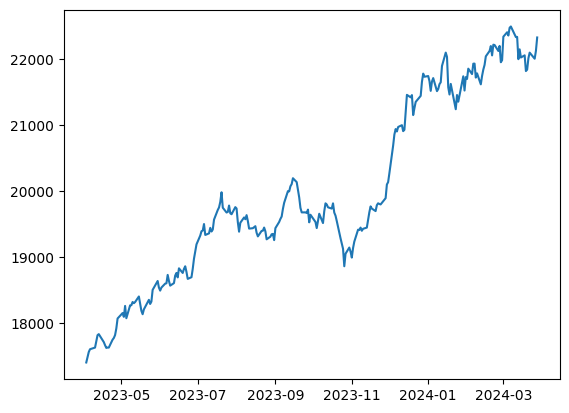

In [19]:
ticker = "^NSEI"
df = yf.download(ticker, start="2023-04-01", end="2024-03-31")
df["Capital"] = [0.0]*len(df)
initial_cap = 100000
for i in range(len(df)):
    df.iat[i,6] = initial_cap * df.iat[i,3] / df.iat[i,0]
    initial_cap = df.iat[i,6]


df["Daily Returns"] = (df["Close"] - df["Open"])*100/df["Open"]

rfr = 2 #assumed risk free rate
#In sharpe ratio we use Annualized standard deviation of exess returns
sharpe_ratio = (df["Daily Returns"].mean() - rfr)/((252**0.5) * df["Daily Returns"].std())

plt.plot(df["Close"])

#From the plot its clear the maximum drawdown is from around 2023-09 to around 2023-11
max_drawdown = df.loc["2023-09-01":"2023-11-01","Close"].max() - df.loc["2023-09-01":"2023-11-01","Close"].min()

print("Sharpe Ratio =", sharpe_ratio)
print("Maximum Drawdown =", max_drawdown)
#Her fonal capital = 96936.089478

Problem 1(d)

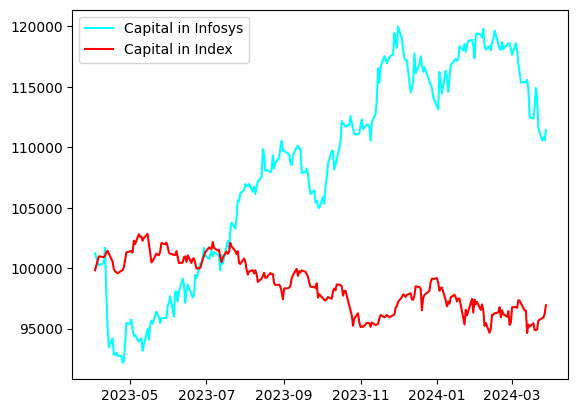

In [20]:
plt.plot(data["Capital"], label="Capital in Infosys", color="cyan")
plt.plot(df["Capital"], label="Capital in Index", color="red")
plt.legend()

Problem 1(e)
Clearly we can see that when invested in Infosys with this strategy Alice's capital increases quite significantly but it also involves risk because of many bearish and bullish areas. Also, a head and shoulder type graph can be observed, and if appicable to the capital as well, it can lead to reversal. So initially the capital is bearish and there is a head and shoulder region, so after 2024-03 there is good chance that the capital becomes bearish so after this its better not to invest more in infosys.


While investing in Index, as shown in graph, is not profitable, it has significantly less risk compared to infosys (since the capital doesn't vary that much) and in later stages it may lead to a bearish graph. So, it is a good choice to continue investing in index with the same strategy.